# Ride - sharing company in Chicago
<a id="the_top"></a>

I am working as an analyst for a new ride-sharing company that's launching in Chicago. My task is to find patterns in the available information. I need to understand passenger preferences and the impact of external factors on rides.

**Step 4. Exploratory data analysis** [link for step 4](#step4)

We have these two CSVs:<br>
1. /datasets/project_sql_result_01.csv.<br>

    It contains the following data:

          company_name: taxi company name
          trips_amount: the number of rides for each taxi company on November 15-16, 2017.
  
2. /datasets/project_sql_result_04.csv.

    It contains the following data:

          dropoff_location_name: Chicago neighborhoods where rides ended
          average_trips: the average number of rides that ended in each neighborhood in November 2017.

**Step 5. Testing hypotheses** [link for step 5](#step5)

/datasets/project_sql_result_07.csv contains data on rides from the Loop to O'Hare International Airport. These are the table's field values:<br>

    1. start_ts: pickup date and time
    2. weather_conditions: weather conditions at the moment the ride started
    3. duration_seconds: ride duration in seconds
    
Test the hypothesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

**General conclusion** [link for general conclusion](#general_conclusion)

## Step 4. Exploratory data analysis
<a id="step4"></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [4]:
company_rides=pd.read_csv(r"C:\Users\TONKA\Dropbox\My PC (SAMSUNG)\Desktop\Practicum100\Python\6. SQL\Project\project_sql_result_01.csv")
company_rides

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


company_rides is a data table with company_name and trips_amount columns. This table represents the number of rides for each taxi company on November 15-16, 2017.

In [5]:
company_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


There are 64 rows with no missing values. company_name is object type and trips_amount is integer type of value.

In [6]:
company_rides.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Mean value of trips_amount is 2145. There are companies that made 2 trips on that day but the most of the companies made 2106. Maximum number of trips for a company was 19 558.

In [7]:
print(company_rides.duplicated().sum())

0


There are no duplicated rows in company_rides table.

In [8]:
top10_companies = company_rides.sort_values(by='trips_amount',ascending=False)
top10_companies = top10_companies.head(10)
top10_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


I sorted the values in company_rides table in descending order and then I took first 10 rows and called them top10_companies by the amount of trips mane on November 15-16, 2017.

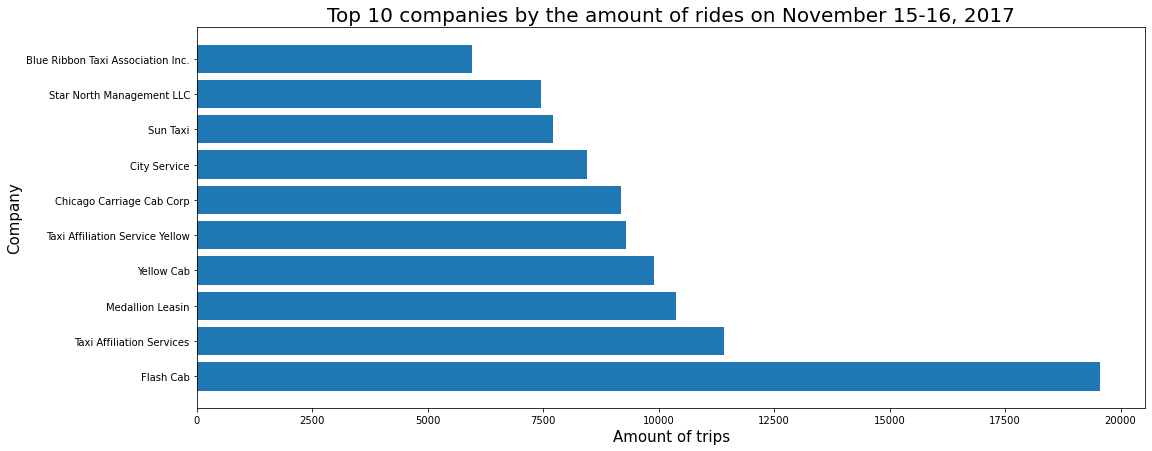

In [9]:
fig,ax=plt.subplots(figsize=(17,7))

plt.style.use('ggplot')

plt.barh(top10_companies.company_name,top10_companies.trips_amount)
plt.title('Top 10 companies by the amount of rides on November 15-16, 2017',fontdict={'size':20})
plt.ylabel('Company',fontdict={'size':15})
plt.xlabel('Amount of trips',fontdict={'size':15})
plt.show()

This graph shows top 10 companies and the number of rides they made on November 15-16, 2017. We can see "Flash Cab" company got the lead by 8136 rides. If the data is accurate, then this Cabs were realy driving like flashes!

In [10]:
drop_offs = pd.read_csv(r"C:\Users\TONKA\Dropbox\My PC (SAMSUNG)\Desktop\Practicum100\Python\6. SQL\Project\project_sql_result_04.csv")
drop_offs

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


drop_offs is a data table with Chicago neighborhoods where rides ended with the average number of rides that ended in each neighborhood in November 2017.

In [11]:
drop_offs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


There are 94 entries in this data table. dropoff_location_name column has object type values and average_trips column has float value type. This table shows the average number of ended rides in a specific neighborhood.

In [12]:
drop_offs.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


The mean value on average number of ended rides in all neighborhoods is 600 rides for the whole month November. Minimum average number for a neighborhood is 1.8. Are there neighborhoods in Chicago that taxies don't drive to or their rides never end in this neighborhoods? For most of the neighborhoods the average number of rides was around 300. Maximum average number of ride is 10727!

In [13]:
print(drop_offs.duplicated().sum())

0


There are no duplcated rows in drop_offs table.

In [14]:
drop_offs = drop_offs.sort_values(by='average_trips',ascending=False)
drop_offs.tail(10)

,dropoff_location_name,average_trips
84,West Pullman,6.466667
85,Montclare,5.766667
86,West Elsdon,5.666667
87,Pullman,3.896552
88,Undef,3.800000
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538
93,Riverdale,1.800000


Here we have 10 neighborhoods that have the lowest average of drop-off taxi od ride-sharing rides. It is possible that these neighborhoods are far away from the Chicago's economy center and there is no demand on these kind of services. It would be useful to know a bit more abouth these neighborhoods: [link on Chicago's neighborhoods](http://www.thechicago77.com/chicago-neighborhoods/)<br>
It seems that the neighborhoods with the least number of drop-offs are the furthest from the economic centar of Chicago. Does this means that there are no rental point in these neighborhoods?

In [15]:
top10_neighborhoods=drop_offs.head(10)
top10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


I sorted the values in drop_offs table in descending order and then I took first 10 rows and called them top10_neighborhoods by the highest average number of trips made in November, 2017.

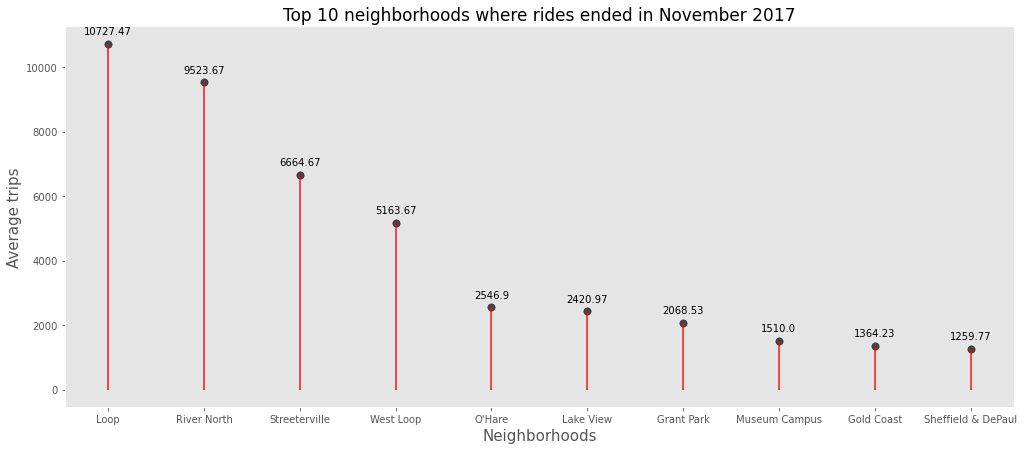

In [16]:
fig,ax=plt.subplots(figsize=(17,7))
ax.grid()
ax.vlines(x=top10_neighborhoods.dropoff_location_name,ymin=0,ymax=top10_neighborhoods.average_trips,color='red',alpha=0.7,linewidth=2)
ax.scatter(x=top10_neighborhoods.dropoff_location_name,y=top10_neighborhoods.average_trips,s=55,color='black',alpha=0.7)

ax.set_title('Top 10 neighborhoods where rides ended in November 2017',fontdict={'size':17})
ax.set_xlabel('Neighborhoods',fontdict={'size':15})
ax.set_ylabel('Average trips',fontdict={'size':15})

for row in top10_neighborhoods.itertuples():
    ax.text(row.dropoff_location_name,row.average_trips+300,s=round(row.average_trips,2),ha='center')

Here we have visualisation for top10 neighborhood with ride drop offs. Loop is the neighborhood with the most drop off rides.  Chicago Loop is the central business district of the city and is the main section of Downtown Chicago. It is the second largest commercial business district in North America and contains the headquarters and regional offices of several global and national businesses, retail establishments, restaurants, hotels, and theaters, as well as many of Chicago's most famous attractions. Knowing this it is easy to understand our data and why is The Loop most frequent destionation share-rides.

CONCLUSION:

"Flash Cab" company got the lead by 8136 rides on November 15-16, 2017.
Chicago Loop is the neighborhood with the most drop_off rides during November, 2017.

## Step 5. Testing hypotheses
<a id="step5"></a>

In [18]:
data = pd.read_csv(r"C:\Users\TONKA\Dropbox\My PC (SAMSUNG)\Desktop\Practicum100\Python\6. SQL\Project\project_sql_result_07.csv")
data

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


This table contains data on rides from the Loop to O'Hare International Airport.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


There are 1068 entries and 3 columns. duration_seconds has float values. start_ts and weather_conditions have object values but start_ts should be in datetime format. There are no missing values in the data.

In [20]:
data['start_ts'] = pd.to_datetime(data['start_ts'],format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


I converted start_ts to datetime64[ns] dtype.

In [21]:
data['day'] = data['start_ts'].dt.day
data['hour'] = data['start_ts'].dt.hour
data

,start_ts,weather_conditions,duration_seconds,day,hour
0,2017-11-25 16:00:00,Good,2410.0,25,16
1,2017-11-25 14:00:00,Good,1920.0,25,14
2,2017-11-25 12:00:00,Good,1543.0,25,12
3,2017-11-04 10:00:00,Good,2512.0,4,10
4,2017-11-11 07:00:00,Good,1440.0,11,7
...,...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,25,11
1064,2017-11-11 10:00:00,Good,1318.0,11,10
1065,2017-11-11 13:00:00,Good,2100.0,11,13
1066,2017-11-11 08:00:00,Good,1380.0,11,8


I extracted day and hour from start_ts and added them to the 'day' and 'hour' column, respectively.

In [22]:
data.describe()

,duration_seconds,day,hour
count,1068.000000,1068.000000,1068.000000
mean,2071.731273,11.019663,11.414794
std,769.461125,6.524597,4.098054
min,0.000000,4.000000,0.000000
25%,1438.250000,4.000000,8.000000
50%,1980.000000,11.000000,12.000000
75%,2580.000000,18.000000,14.000000
max,7440.000000,25.000000,23.000000


There are rides with duration of 0 seconds. I find this rides to be an artifact. It could be the driver declared starting the ride accidentally or the customer change their mind and decided not to take a ride. Mean value is 2071 seconds, and most of the rides are 2580 seconds long. Maximum value is 7440 (around 2 hours) which is still acceptable.

In [23]:
data[data['duration_seconds']==0]

,start_ts,weather_conditions,duration_seconds,day,hour
163,2017-11-11 09:00:00,Good,0.0,11,9
168,2017-11-11 07:00:00,Good,0.0,11,7
204,2017-11-18 19:00:00,Good,0.0,18,19
552,2017-11-04 01:00:00,Good,0.0,4,1
801,2017-11-04 09:00:00,Good,0.0,4,9
1063,2017-11-25 11:00:00,Good,0.0,25,11


There are 6 rides with duration_seconds zero. considering there are 1068 rides in this data sample, I will erase these zero seconds rides.

In [24]:
data.drop(data.index[data['duration_seconds']==0],axis=0,inplace=True)
data.reset_index(drop=True)

,start_ts,weather_conditions,duration_seconds,day,hour
0,2017-11-25 16:00:00,Good,2410.0,25,16
1,2017-11-25 14:00:00,Good,1920.0,25,14
2,2017-11-25 12:00:00,Good,1543.0,25,12
3,2017-11-04 10:00:00,Good,2512.0,4,10
4,2017-11-11 07:00:00,Good,1440.0,11,7
...,...,...,...,...,...
1057,2017-11-11 06:00:00,Good,1500.0,11,6
1058,2017-11-11 10:00:00,Good,1318.0,11,10
1059,2017-11-11 13:00:00,Good,2100.0,11,13
1060,2017-11-11 08:00:00,Good,1380.0,11,8


I deleted rides with duration of 0 seconds.

In [25]:
data.describe(include=['object'])

,weather_conditions
count,1062
unique,2
top,Good
freq,882


There are 882 rides during good weather and only 180 rides during bad weather.

In [26]:
data.day.value_counts()

11    424
4     365
18    179
25     94
Name: day, dtype: int64

There are 424 rides on November 11, 365 rides on November 4, 179 rides on November 18 and 94 rides on November 25.

In [27]:
data_11 = data.query('day==11')
data_11.weather_conditions.value_counts()

Good    424
Name: weather_conditions, dtype: int64

data_11 are ride on November 11. We can see the weather was good during the whole day with no rain.

In [28]:
data_11

,start_ts,weather_conditions,duration_seconds,day,hour
4,2017-11-11 07:00:00,Good,1440.0,11,7
5,2017-11-11 04:00:00,Good,1320.0,11,4
8,2017-11-11 14:00:00,Good,2460.0,11,14
9,2017-11-11 12:00:00,Good,2040.0,11,12
12,2017-11-11 08:00:00,Good,1470.0,11,8
...,...,...,...,...,...
1059,2017-11-11 10:00:00,Good,1303.0,11,10
1062,2017-11-11 06:00:00,Good,1500.0,11,6
1064,2017-11-11 10:00:00,Good,1318.0,11,10
1065,2017-11-11 13:00:00,Good,2100.0,11,13


data_11 table.

In [29]:
data_11_pivot = data_11.pivot_table(index='hour',values='duration_seconds',aggfunc={'count','sum'})
data_11_pivot.columns =['num_of_rides','duration_of_rides']
data_11_pivot

,num_of_rides,duration_of_rides
hour,,
3,2,2365.0
4,12,16016.0
5,11,15352.0
6,45,63551.0
7,32,42884.0
8,43,57808.0
9,22,31008.0
10,48,69339.0
11,29,48089.0


data_11_pivot is data table with hours as index. Coulumns are num_of_rides and duration_of_rides.

In [30]:
data_11_pivot['seconds_pro_ride'] = data_11_pivot['duration_of_rides'] / data_11_pivot['num_of_rides']
data_11_pivot.sort_values(by='duration_of_rides',ascending=False)

,num_of_rides,duration_of_rides,seconds_pro_ride
hour,,,
16,32,79594.0,2487.312500
14,33,79065.0,2395.909091
12,39,77217.0,1979.923077
10,48,69339.0,1444.562500
6,45,63551.0,1412.244444
8,43,57808.0,1344.372093
11,29,48089.0,1658.241379
13,20,43923.0,2196.150000
15,17,43673.0,2569.000000


I added seconds_pro_ride column because I am interested to see duration of every ride on average during each hour.
I can see that average duration pro ride is changeable. For example, at 10am there were 48 rides and average duration of a ride was 1445 seconds. At 6pm there were 12 rides and average duration was much higer than at 10am; 2580 seconds.

In [31]:
print(data_11_pivot['num_of_rides'].corr(data_11_pivot['duration_of_rides']))

0.9079394269165815


Pearson's correlation coefficient tells us that there is positive correlation between num_of_rides and duration_of_rides. We can say "the higher the num_of_rides, the higher duration_of_rides". Correlation is very strong strong.
It makes sense; more cars on the road, more traffic, more time to get from pne point to another.

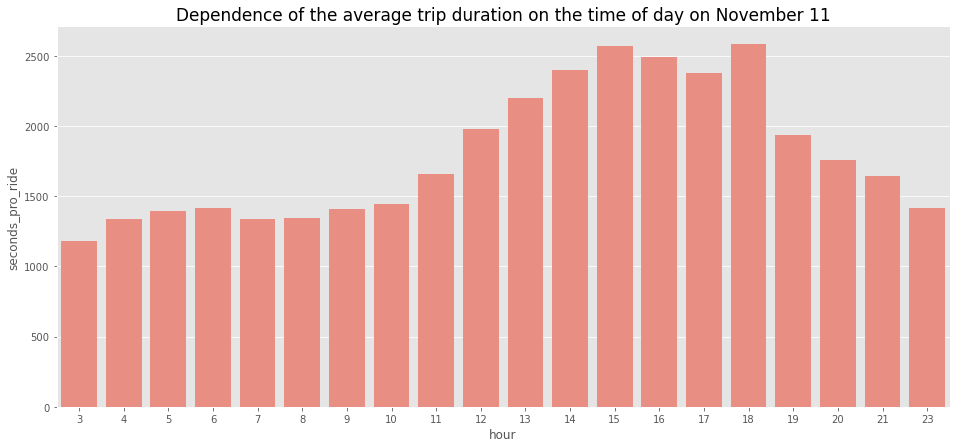

In [32]:
fig,ax=plt.subplots(figsize=(16,7))
ax = sns.barplot(x="hour", y="seconds_pro_ride", data=data_11_pivot.reset_index(), color="salmon")
ax.set_title('Dependence of the average trip duration on the time of day on November 11',fontdict={'size':17})
plt.show()

Now we have a good example of the traffic patter for nice weather.

In [33]:
data_4 = data.query('day==4')
data_4.weather_conditions.value_counts()

Good    285
Bad      80
Name: weather_conditions, dtype: int64

data_4 represents rides on 4th November. There were 285 rides during good weather and 80 rides during rain.

In [34]:
data_4_pivot_table = data_4.pivot_table(index=['hour','weather_conditions'],values='duration_seconds',aggfunc=['count','sum'])
data_4_pivot_table

,,count,sum
,,duration_seconds,duration_seconds
hour,weather_conditions,,
0,Good,1,1560.0
2,Good,1,2956.0
4,Good,5,6969.0
5,Good,9,11733.0
6,Good,26,37143.0
7,Good,14,18688.0
8,Good,25,37227.0
9,Good,13,21733.0


data_4_pivot_table is pivot table with hour and weather_conditions being indices. Columns are number of rides and duration of rides.

In [35]:
data_4_pivot_table.columns = ['num_of_rides','duration_of_rides']
data_4_pivot_table

,,num_of_rides,duration_of_rides
hour,weather_conditions,,
0,Good,1,1560.0
2,Good,1,2956.0
4,Good,5,6969.0
5,Good,9,11733.0
6,Good,26,37143.0
7,Good,14,18688.0
8,Good,25,37227.0
9,Good,13,21733.0
10,Good,30,65927.0


I renamed the column names into num_of_rides and duration_of_rides

In [36]:
data_4_pivot_table['seconds_pro_ride'] = data_4_pivot_table['duration_of_rides'] / data_4_pivot_table['num_of_rides']
data_4_pivot_table.sort_values(by='num_of_rides',ascending=False)

,,num_of_rides,duration_of_rides,seconds_pro_ride
hour,weather_conditions,,,
12,Good,46,123805.0,2691.413043
14,Good,46,149267.0,3244.934783
16,Bad,39,115926.0,2972.461538
10,Good,30,65927.0,2197.566667
6,Good,26,37143.0,1428.576923
8,Good,25,37227.0,1489.080000
11,Good,25,62289.0,2491.560000
17,Bad,24,58428.0,2434.500000
15,Good,19,61958.0,3260.947368


I added seconds_pro_ride column. 

On 4th November there were 365 rides. 285 rides during good and 80 rides during bad weather. We can see most of the ride happened during good weather at 12 and 14h;46 rides. At 16h was bad weather but still a lot of rides;39. An hour before, at 15h was good weather with just 19 rides but average duration pro ride was 3260 seconds. Something must have caused this delay in traffic; maybe a car accident?

In [37]:
print(data_4_pivot_table['num_of_rides'].corr(data_4_pivot_table['duration_of_rides']))

0.9537329279670139


There is also strong correlation between num_of_rides and duration_of_rides.

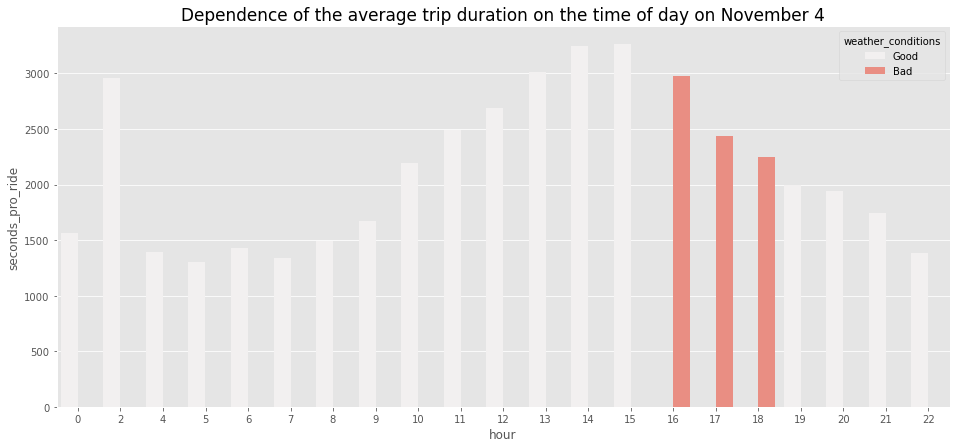

In [38]:
fig,ax=plt.subplots(figsize=(16,7))
ax = sns.barplot(x="hour", 
                 y="seconds_pro_ride", 
                 data=data_4_pivot_table.reset_index(), 
                 hue="weather_conditions",
                 color="salmon")
ax.set_title('Dependence of the average trip duration on the time of day on November 4',fontdict={'size':17})
plt.show()

If we compare with data for November 11, we could conclude that the average trip duration during bad weather hours is the same for these hours with good weather.

In [36]:
data_18 = data.query('day==18')
data_18.weather_conditions.value_counts()

Bad     100
Good     79
Name: weather_conditions, dtype: int64

data_18 are rides on November 18. There were 100 rides on bad weather and only 79 rides on good weather.

In [37]:
data_18_pivot_table = data_18.pivot_table(index=['hour','weather_conditions'],values='duration_seconds',aggfunc=['count','sum'])
data_18_pivot_table

,,count,sum
,,duration_seconds,duration_seconds
hour,weather_conditions,,
0,Bad,1,480.0
3,Good,1,1259.0
4,Good,2,2871.0
5,Good,10,15237.0
6,Good,20,30558.0
7,Bad,12,16828.0
8,Bad,17,24889.0
9,Bad,2,2757.0


data_18_pivot_table is pivot table with hour and weather_conditions as index and number of rides and duration of rides as columns.

In [38]:
data_18_pivot_table.columns = ['num_of_rides','duration_of_rides']

I renamed the columns in data_18_pivot_table to 'num_of_rides' and 'duration_of_rides'.

In [39]:
data_18_pivot_table['seconds_pro_ride'] = data_18_pivot_table['duration_of_rides'] / data_18_pivot_table['num_of_rides']
data_18_pivot_table.sort_values(by='num_of_rides',ascending=False)

,,num_of_rides,duration_of_rides,seconds_pro_ride
hour,weather_conditions,,,
12,Bad,26,72161.0,2775.423077
6,Good,20,30558.0,1527.900000
14,Good,18,57079.0,3171.055556
8,Bad,17,24889.0,1464.058824
13,Bad,14,45896.0,3278.285714
10,Bad,14,24209.0,1729.214286
7,Bad,12,16828.0,1402.333333
11,Good,11,24954.0,2268.545455
5,Good,10,15237.0,1523.700000


I added seconds_pro_ride to data_18_pivot_table. 

There were 179 rides on November 18; 100 hundret rides during bad weather and 79 rides during good weather. Now here we have a situation with more rides during bad weather. People still need to get to their destinations inspite of rain! The most rides happened at 12h during bad weather.

In [40]:
print(data_18_pivot_table['num_of_rides'].corr(data_18_pivot_table['duration_of_rides']))

0.9079031907751705


Correlation between num_of_rides and duration_of_rides is strong.

In [41]:
data_25= data.query('day==25')
data_25.weather_conditions.value_counts()

Good    94
Name: weather_conditions, dtype: int64

data_25 are rides on November 25. There were only 94 rides during the day and weather was good during every ride.

In [42]:
data_25_pivot = data_25.pivot_table(index='hour',values='duration_seconds',aggfunc={'count','sum'})
data_25_pivot.columns =['num_of_rides','duration_of_rides']
data_25_pivot

,num_of_rides,duration_of_rides
hour,,
3,1,1374.0
4,1,1384.0
5,6,8200.0
6,5,8136.0
7,4,6329.0
8,3,3857.0
9,3,4306.0
10,8,11873.0
11,9,19705.0


data_25_pivot has hour as index and num_of_rides and duration_of_rides as columns.

In [43]:
data_25_pivot['seconds_pro_ride'] = data_25_pivot['duration_of_rides'] / data_25_pivot['num_of_rides']
data_25_pivot.sort_values(by='num_of_rides',ascending=False)

,num_of_rides,duration_of_rides,seconds_pro_ride
hour,,,
12,13,20088.0,1545.230769
11,9,19705.0,2189.444444
10,8,11873.0,1484.125000
14,7,17086.0,2440.857143
16,7,16054.0,2293.428571
18,7,20222.0,2888.857143
5,6,8200.0,1366.666667
15,6,12687.0,2114.500000
6,5,8136.0,1627.200000


On November 25 weather was good during all the rides. So, we have good weather but still we have the least rides comparing with other Saturdays in November, 2017; only 94 rides! So the most of the rides happened at 12, 9 and 8 o'clock.

In [44]:
print(data_25_pivot['num_of_rides'].corr(data_25_pivot['duration_of_rides']))

0.9070386109326858


Correlation between num_of_rides and duration_of_rides is very strong.

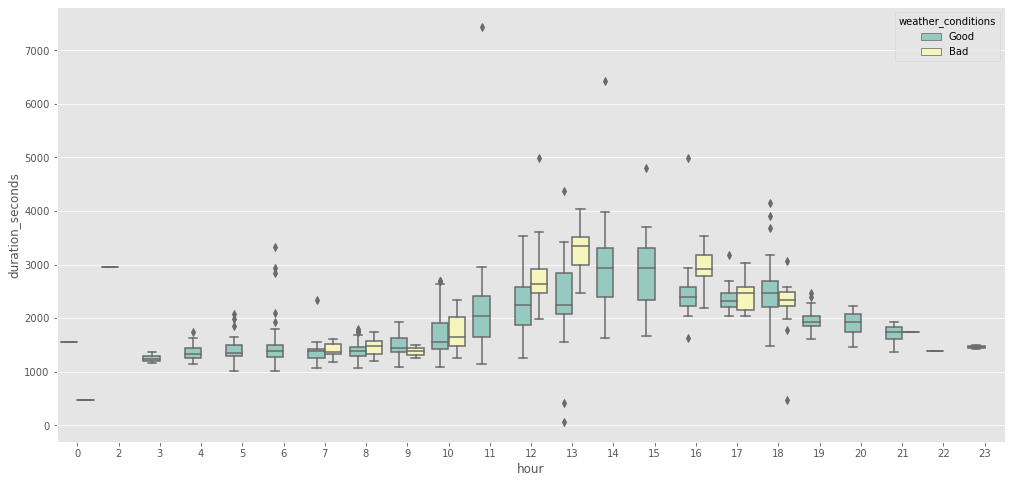

In [39]:
fig,ax=plt.subplots(figsize=(17,8))
ax = sns.boxplot(x="hour", y="duration_seconds", hue="weather_conditions",
                 data=data, palette="Set3")

We could see how trip duration changes through time. Duration goes up around 10am and goes down around 18h. The peaks are between 13 and 14h.

There are also some outlier during whole day. These could occur because of carr accidents, road blocks or something else.

In [46]:
good_weather = data[data['weather_conditions']=='Good']
good_weather

,start_ts,weather_conditions,duration_seconds,day,hour
0,2017-11-25 16:00:00,Good,2410.0,25,16
1,2017-11-25 14:00:00,Good,1920.0,25,14
2,2017-11-25 12:00:00,Good,1543.0,25,12
3,2017-11-04 10:00:00,Good,2512.0,4,10
4,2017-11-11 07:00:00,Good,1440.0,11,7
...,...,...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0,4,14
1062,2017-11-11 06:00:00,Good,1500.0,11,6
1064,2017-11-11 10:00:00,Good,1318.0,11,10
1065,2017-11-11 13:00:00,Good,2100.0,11,13


good_weather is data with rides only during good weather.

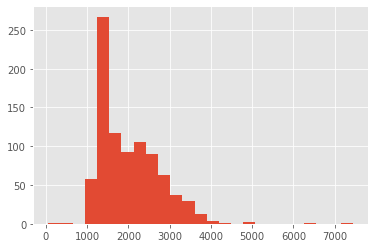

In [47]:
good_weather['duration_seconds'].hist(bins=25)
plt.show()

Here we have frequencies of duration of rides on good weather. We can see the peek is a bit less than 1500 seconds.

In [48]:
bad_weather = data[data['weather_conditions']=='Bad']
bad_weather

,start_ts,weather_conditions,duration_seconds,day,hour
6,2017-11-04 16:00:00,Bad,2969.0,4,16
30,2017-11-18 12:00:00,Bad,1980.0,18,12
34,2017-11-04 17:00:00,Bad,2460.0,4,17
51,2017-11-04 16:00:00,Bad,2760.0,4,16
52,2017-11-18 12:00:00,Bad,2460.0,18,12
...,...,...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0,18,12
1032,2017-11-18 10:00:00,Bad,1908.0,18,10
1053,2017-11-18 12:00:00,Bad,2400.0,18,12
1061,2017-11-18 16:00:00,Bad,2186.0,18,16


bad_weather is data with rides only during bad weather.

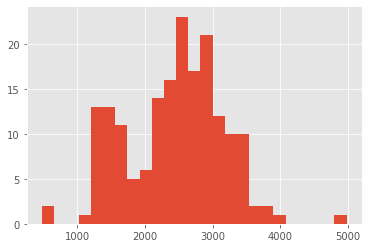

In [49]:
bad_weather['duration_seconds'].hist(bins=25)
plt.show()

Here we have frequencies of duration of rides on bad weather. We can see the peek is now higher than 2500 seconds.

My null hypothesis for the statistical testing is: "Average duration of a ride during good and bad weather is the same."

Alternative hypothesis: "Average duration of a ride during good and bad weather changes."

In [50]:
print(good_weather['duration_seconds'].mean())
print(good_weather['duration_seconds'].median())

print(bad_weather['duration_seconds'].mean())
print(bad_weather['duration_seconds'].median())

2013.2789115646258
1800.0
2427.2055555555557
2540.0


 Mean and median values are very close together, so the skewnes of data is not too big.

In [51]:
st.levene(good_weather['duration_seconds'], bad_weather['duration_seconds'], center='mean')

LeveneResult(statistic=0.424296319156277, pvalue=0.5149422013161751)

I am using Levene's test to determine equality of variance of the sample groups.
The p-value of the test is greater than the threshold value of 0.05 and hence; the sample groups do have equal variance.

Alpha or critical statistical significance in this statistical testing is 0.05.

In [52]:
result = st.ttest_ind(good_weather['duration_seconds'],bad_weather['duration_seconds'],equal_var=True)
print('p-value is',result.pvalue)

p-value is 1.3318772977743245e-11


My null hypothesis from the statistical testing is: "Average duration of a ride during good and bad weather is the same."

Alternative hypothesis: "Average duration of a ride during good and bad weather changes."

Alpha or critical statistical significance in this statistical testing is 0.10.
p_value is less than 10% so we should reject null hypothesis. It is most likely that the average duration of a ride during good and bad weather changes.

CONCLUSION:

There are far less rides during rainy days than on good weather days.
Still, the average rides that happen on rainy day and during good weather are most likely different.

## General conclusion
<a id="general_conclusion"></a>

There is an impact of weather on ride frequencies. There are 882 rides during good weather and only 180 rides during bad weather; 83% of rides during good weather and 17% of rides during bad weather. The statistic comes from 4 days in November. It would be useful to know statistics on average rainy days throught Noveber; it is around 10 days. The rest of 20 days are without rain or snowfall.
You could check the statistics on rainy days on [this link](https://weather-and-climate.com/average-monthly-Rainy-days,Chicago,United-States-of-America).

It is most likely that the average duration of a ride during good and bad weather changes. Still, on November 11 at 10am there were 48 rides and average duration of a ride was 1445 seconds. At 6pm there were 12 rides and average duration was much higer than at 10am; 2580 seconds. The weather during every ride on that day was good. This means it is possible that there is another reason which affects duration of a ride. 

It would be helpful to have more parameters on every ride. For example; the distance the car traveled, some checkpoints during the ride (pick_up and drop-off location and some in between), conditions on the road (accidets, road works, fog), time of sunrise, time of sunset, type of traveling that customers use, retal points or starting points of taxies, type of charging and so one. 

Correlation between number of rides and duration of rides is very strong. The higher the number of rides in an hour, the higer duration of rides. 

It would be useful to know what kind of service did customers use, taxi, car-sharing or something else. Then we could see is there any correlation within these parameters.

[here is a link to the top of the document](#the_top)